In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dowload Image from link

In [ ]:
from google.colab import files as FILE
import os
import requests

img_data = requests.get('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fthumbs.dreamstime.com%2Fz%2Fgroup-friends-sitting-outdoor-seat-together-55897611.jpg&f=1&nofb=1').content
with open('index.jpg', 'wb') as handler:
    handler.write(img_data)

# Detect and save croped faces

In [ ]:
import cv2
import os

classifier = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
dirFace = 'cropped_face'

# Create if there is no cropped face directory
if not os.path.exists(dirFace):
    os.mkdir(dirFace)
    print("Directory " , dirFace ,  " Created ")
else:    
    print("Directory " , dirFace ,  " has found.")


path = r'/content/index.jpg'

im = cv2.imread(path, 0)

# detectfaces 
faces = classifier.detectMultiScale(
    im, # stream 
    scaleFactor=1.10, # change these parameters to improve your video processing performance
    minNeighbors=20, 
    minSize=(48, 48) # min image detection size
    ) 

# Draw rectangles around each face
for (x, y, w, h) in faces:

    cv2.rectangle(im, (x, y), (x + w, y + h),(0,0,255),thickness=2)
    # saving faces according to detected coordinates 
    sub_face = im[y:y+h, x:x+w]
    FaceFileName = "cropped_face/face_" + str(y+x) + ".jpg" # folder path and random name image
    cv2.imwrite(FaceFileName, sub_face)


Directory  cropped_face  Created 


# Reduce image pixels (48 x 48)




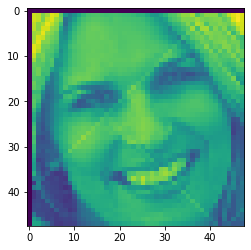

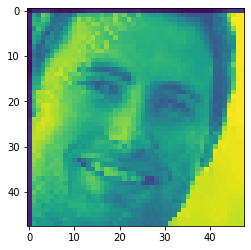

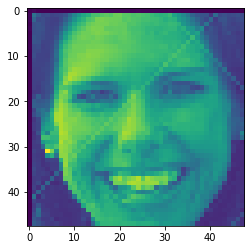

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# assign directory
directory = '/content/cropped_face'

data = []

# iterate over files in that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    # checking if it is a file
    if os.path.isfile(f):
        image = cv2.imread(f, 0)
        img = cv2.resize(image, (48, 48))
        plt.imshow(img)
        plt.show()

        #extracting pixels from image
        rows,cols = img.shape
        pixels = ""
        
        for i in range(rows):
            for j in range(cols):
                pixels = pixels + " " + str(img[i,j])

        # data rows of csv file
        data.append([filename, pixels])


# name of csv file 
filename = "/content/drive/MyDrive/genderDetect/test_data.csv"

fields = ["img_name", "pixels"]
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(data)


#remove the folder after testing
!rm -rf "/content/cropped_face"